In [ ]:
# Do NOT modify this block of code

import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# DO NOT MODIFY
# laoding in the data
accident = pd.read_csv("https://raw.githubusercontent.com/MIE223-2025/course-datasets/main/accident.csv")
print(accident.shape)
accident.head()

(12422, 8)


,ID,Severity,Time,City,Traffic_Signal,Humidity(%),Crossing,Sunrise_Sunset
0,A-3515243,2,2016-06-24 09:33:07,Tempe,False,19.0,False,Day
1,A-1713347,2,2019-12-13 08:19:47,Buffalo,False,63.0,False,Day
2,A-1882938,2,2019-09-27 08:30:25,Cincinnati,True,84.0,True,Day
3,A-904576,3,2021-09-10 08:03:42,Syracuse,False,86.0,False,Day
4,A-3386624,2,2017-08-18 18:12:05,Ladson,False,66.0,False,Day


In [ ]:
accident['Time'] = pd.to_datetime(accident['Time'])

#Turns boolean into int, correct for "dummy variable"
accident.insert(loc = 0, column = 'is_13th', value = (accident['Time'].dt.day == 13).astype(int))

In [ ]:
# Do not uncommend the code until you finish Q1a
# Do not change the code

accident['is_13th'].value_counts()

,count
is_13th,
0,11963
1,459


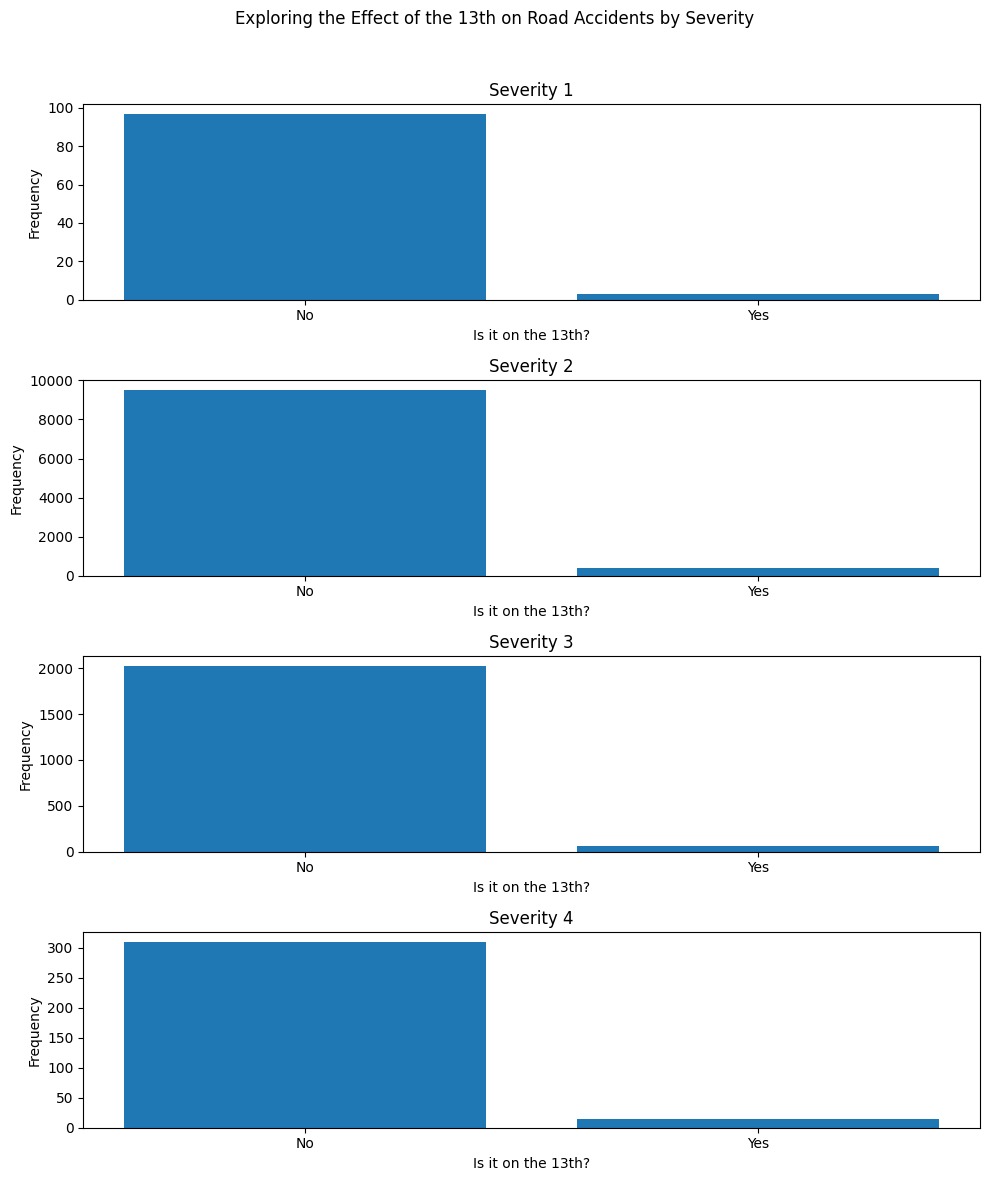

In [ ]:
plt.figure(figsize=(10, 12))
plt.suptitle("Exploring the Effect of the 13th on Road Accidents by Severity")

#Subplot for severity 1

plt.subplot(4, 1, 1)
severity_one_series = accident.loc[accident['Severity'] == 1, 'is_13th'].value_counts()
plt.bar(severity_one_series.index, severity_one_series.values)
plt.ylabel("Frequency")
plt.xlabel("Is it on the 13th?")
plt.xticks([0, 1], ['No', 'Yes'])
plt.title("Severity 1")

#Subplot for severity 2

plt.subplot(4, 1, 2)
severity_two_series = accident.loc[accident['Severity'] == 2, 'is_13th'].value_counts()
plt.bar(severity_two_series.index, severity_two_series.values)
plt.ylabel("Frequency")
plt.xlabel("Is it on the 13th?")
plt.xticks([0, 1], ['No', 'Yes'])
plt.title("Severity 2")

#Subplot for severity 3

plt.subplot(4, 1, 3)
severity_three_series = accident.loc[accident['Severity'] == 3, 'is_13th'].value_counts()
plt.bar(severity_three_series.index, severity_three_series.values)
plt.ylabel("Frequency")
plt.xlabel("Is it on the 13th?")
plt.xticks([0, 1], ['No', 'Yes'])
plt.title("Severity 3")

#Subplot for severity 4

plt.subplot(4, 1, 4)
severity_four_series = accident.loc[accident['Severity'] == 4, 'is_13th'].value_counts()
plt.bar(severity_four_series.index, severity_four_series.values)
plt.ylabel("Frequency")
plt.xlabel("Is it on the 13th?")
plt.xticks([0, 1], ['No', 'Yes'])
plt.title("Severity 4")

#Much Better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])

In [ ]:
accident_copy = accident.copy()

#Pandas series for top three cities with frequency
top_three_cities = accident_copy.groupby('City').size().sort_values(ascending = False).iloc[:3]

#Keeping only the top three cities
accident_copy = accident_copy.loc[accident_copy['City'].apply(lambda x: x in top_three_cities.index.tolist())]

#Excluding non numerical columns
accident_copy = accident_copy.select_dtypes(include=['number', 'bool'])

accident_copy.corr()

,is_13th,Severity,Traffic_Signal,Humidity(%),Crossing
is_13th,1.000000,-0.056905,0.014243,-0.003089,-0.022912
Severity,-0.056905,1.000000,-0.106094,0.021986,-0.144736
Traffic_Signal,0.014243,-0.106094,1.000000,0.088815,0.302471
Humidity(%),-0.003089,0.021986,0.088815,1.000000,0.043972
Crossing,-0.022912,-0.144736,0.302471,0.043972,1.000000


In [ ]:
#Changing severity in terms of rating to wording
accident['Severity'] = accident['Severity'].apply(lambda x: "most serious" if x == 1 else ("very serious" if x == 2 else ("serious" if x == 3 else "light")))

#Cross tabulation
crosstab = pd.crosstab(index = accident['Severity'], columns = accident['Crossing'])

#Normalizing
crosstab = crosstab.div(crosstab.sum(axis = 1), axis = 0)

crosstab

Crossing,False,True
Severity,,
light,0.938462,0.061538
most serious,0.650000,0.350000
serious,0.963087,0.036913
very serious,0.861770,0.138230


Text(0, 0.5, 'Proportion')

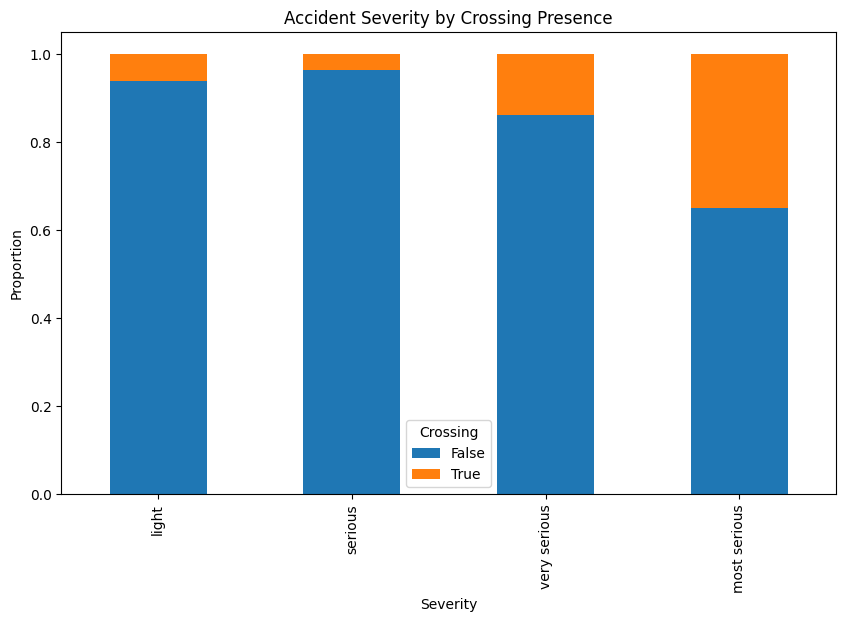

In [ ]:
# DO NOT modify the code,
# UNCOMMEND it until you finish Q1d

order = ["light", "serious", "very serious", "most serious"]
crosstab = crosstab.reindex(order)
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Accident Severity by Crossing Presence")
plt.xlabel("Severity")
plt.ylabel("Proportion")

In [ ]:
# Do NOT modify this block of code

# loading in the data
google_playstore_df = pd.read_csv("https://raw.githubusercontent.com/MIE223-2025/course-datasets/main/googleplaystore.csv")

print(google_playstore_df.shape)
google_playstore_df.head()

(10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Cleaning the Data

In [ ]:
# Do NOT modify this block of code
google_playstore_df[google_playstore_df['Category'] == '1.9'] # corrupted row

# Dropping the corrupted row
google_playstore_df = google_playstore_df.drop(10472, axis=0)
google_playstore_df.shape

(10840, 13)

In [ ]:
# Do NOT modify this block of code
google_playstore_df.isnull().sum() / google_playstore_df.shape[0] # % of null values per column

,0
App,0.000000
Category,0.000000
Rating,0.135978
Reviews,0.000000
Size,0.000000
Installs,0.000000
Type,0.000092
Price,0.000000
Content Rating,0.000000
Genres,0.000000


In [ ]:
# Do NOT modify this block of code

# Dropping rows with null values
google_playstore_df = google_playstore_df.dropna(axis=0)

print(f"Number of missing values is: {google_playstore_df.isnull().sum().sum()}, shape of data is: {google_playstore_df.shape}")
google_playstore_df.head()

Number of missing values is: 0, shape of data is: (9360, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# Do NOT modify this block of code
google_playstore_df.dtypes # checking the data types

,0
App,object
Category,object
Rating,float64
Reviews,object
Size,object
Installs,object
Type,object
Price,object
Content Rating,object
Genres,object


In [ ]:
# Do NOT modify this block of code
google_playstore_df.nunique() # checking the number of unique values per feature

,0
App,8190
Category,33
Rating,39
Reviews,5990
Size,413
Installs,19
Type,2
Price,73
Content Rating,6
Genres,115


In [ ]:
# Do NOT modify this block of code
def format_number(num: str) -> float:
    """Function to format a number by converting the place value from string to number e.g 1k to 1000, 1M to 1000000
    """
    num = num.lower() # convert to lowercase

    # if str number can be converted to float without further cleanup, convert it and return it
    try:
        return float(num.strip())
    except ValueError:
        pass

    # if after relacing the place value with number, num is still not convertible to float, return Nan e.g 'Varies with device' in Size column
    try:
        float(num[:-1].strip())
    except ValueError:
        return np.nan

    # else, replace the str place value by multiplying by the appropriate multiple of 10
    suffix_mapper = {'k': 1E3, 'm': 1E6, 'g': 1E9}

    return float(num[:-1]) * suffix_mapper[num[-1]]

In [ ]:
# Do NOT modify this block of code
def format_place_value(num: str) -> str:
    """Function to format a number by converting it to its abbreviated place value e.g 1000 to 1k, 1000000 to 1M
    """
    num = int(num.strip("+").strip().replace(",", ""))

    if num >= 1_000_000_000:
        return f"{num // 1_000_000_000}G+"

    if num >= 1_000_000:
        return f"{num // 1_000_000}M+"

    if num >= 1000:
        return f"{num // 1000}k+"

    return f"{num}+"

In [ ]:
# Do NOT modify this block of code
google_playstore_df['Log-Reviews'] = np.log(google_playstore_df.loc[:, 'Reviews'].astype(int)) # Converting 'reviews' column to float and taking the log

google_playstore_df['Price'] = google_playstore_df['Price'].apply(lambda x: float(x.strip("$"))) # stripping $ and converting price to float

google_playstore_df['Last Updated'] = pd.to_datetime(google_playstore_df['Last Updated']) # converting 'Last Updated' to datetime object

google_playstore_df['Size'] = google_playstore_df['Size'].apply(format_number) # formating 'Size'. Note that after formatting, Nan values actually
                                                                               # indicate that the 'Size' varies with device.

google_playstore_df['Installs'] = google_playstore_df['Installs'].apply(format_place_value) # formatting 'Installs'

google_playstore_df['is_good_rating'] = google_playstore_df.loc[:, 'Rating'].apply(lambda x: 1 if x >= 4 else 0) # creating rating category

google_playstore_df["Install dummy"] = google_playstore_df["Installs"].apply(lambda x:  "Low" if len(x) <=4  else "High")

In [ ]:
# Do NOT modify this block of code
google_playstore_df.head() # checking the head of the cleaned data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Log-Reviews,is_good_rating,Install dummy
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10k+,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,5.068904,1,Low
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500k+,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,6.874198,0,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5M+,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,11.379508,1,Low
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50M+,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,12.281384,1,Low
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100k+,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,6.874198,1,High


In [ ]:
# Do NOT modify this block of code
continuous_cols = ['Rating', 'Log-Reviews', 'Size', 'Price']

Text(0.5, 1.05, 'Pairplot of Continuous Features for Free Apps')

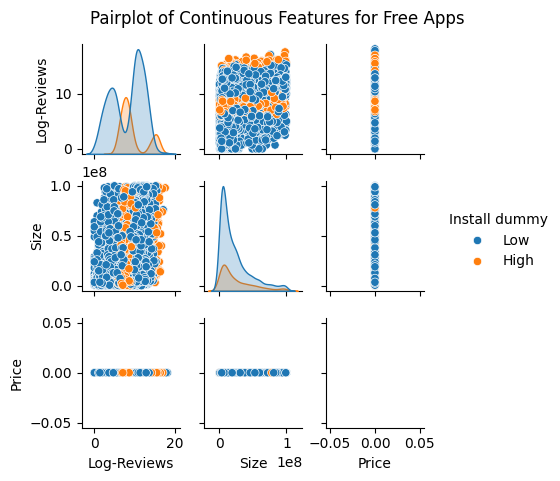

In [ ]:
#Keeping only specified continuous columns in, as well as Install dummy for hue
google_playstore_df_copy = google_playstore_df.copy().loc[ :, ['Log-Reviews','Size', 'Price', 'Install dummy']]

#Getting only free apps
google_playstore_df_copy = google_playstore_df_copy[google_playstore_df_copy['Price'] == 0]

#Choose continous features for pairplot
sns.pairplot(google_playstore_df_copy, hue = "Install dummy", height = 1.5)

plt.suptitle("Pairplot of Continuous Features for Free Apps", y = 1.05)


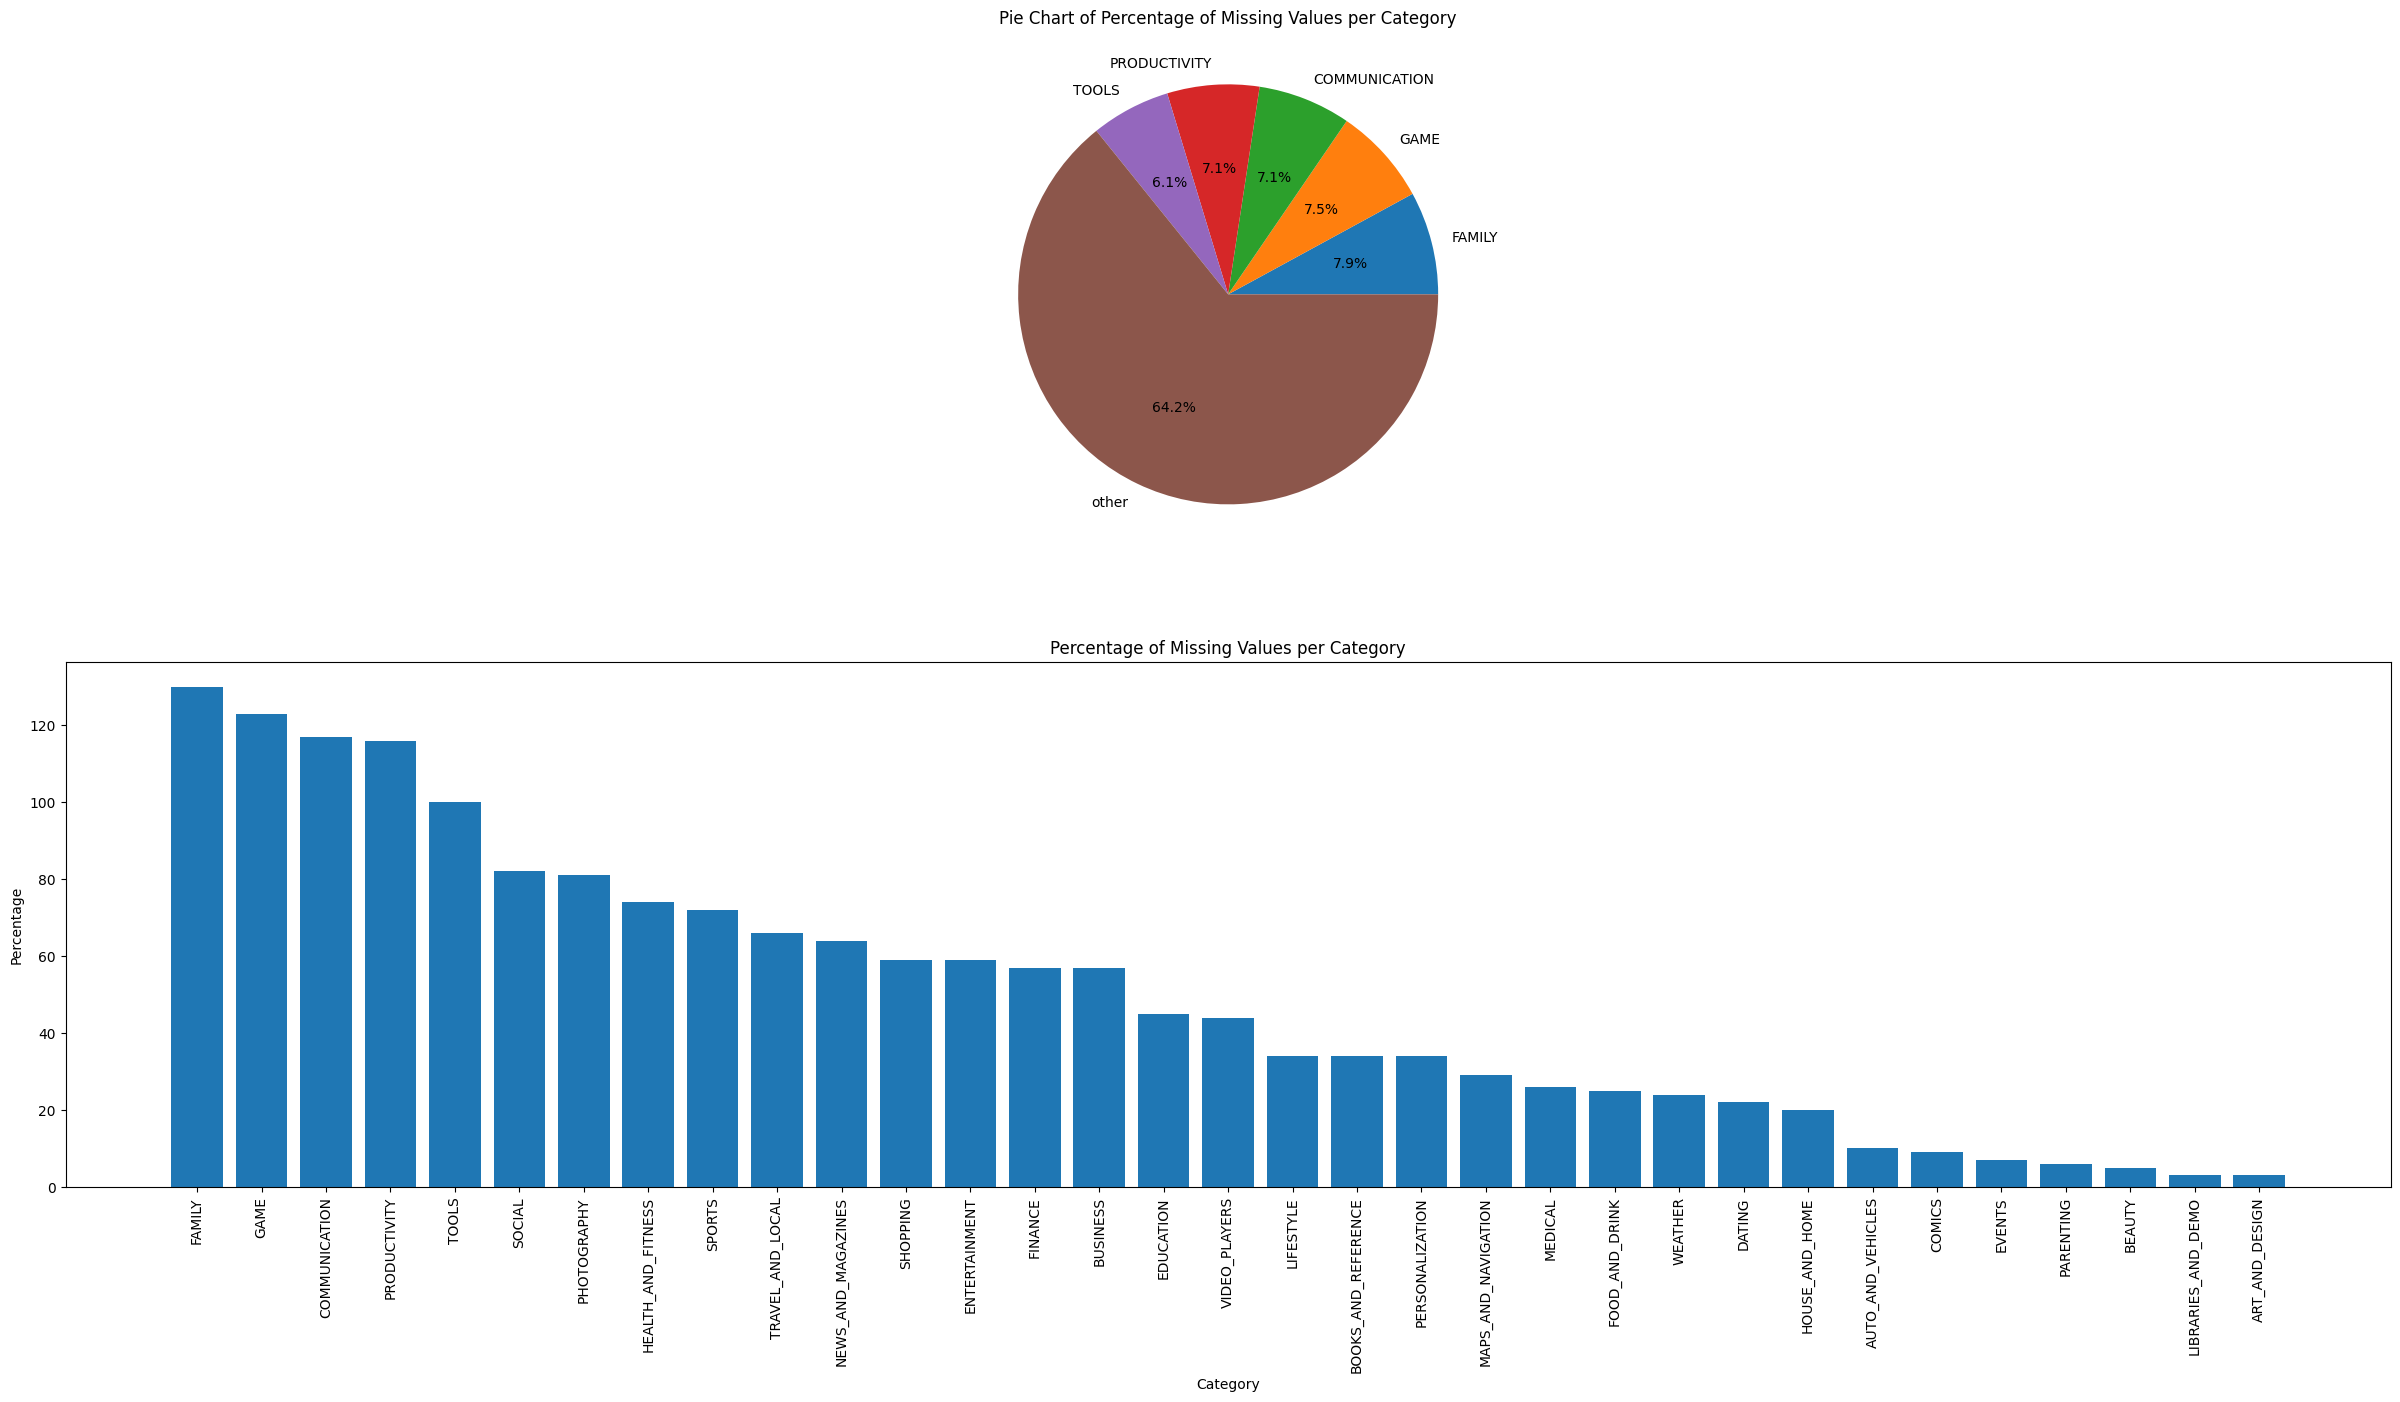

In [ ]:
plt.figure(figsize=(30, 15))

#Subplot for pie chart
plt.subplot(2, 1, 1)

#Getting the ratio of missing values per category relative to cumalative missing values
missing_by_category = google_playstore_df.groupby('Category')['Size'].apply(lambda x: x.isna().sum()) / google_playstore_df.groupby('Category')['Size'].apply(lambda x: x.isna().sum()).sum()

#Sorting
missing_by_category = missing_by_category.sort_values(ascending = False)

#Checking if it all adds up
#dat = missing_by_category.iloc[:5].sum()
#other = missing_by_category.iloc[5:].sum()

#Keeping only top 5 columns in series
to_plot = missing_by_category.copy().iloc[:5]

#Getting percentage for not top 5
other_value = missing_by_category.iloc[5:].sum()

#Adding other with value into series to plot
to_plot.loc["other"] = other_value

#Plot pie
plt.pie(to_plot.values, labels = to_plot.index, autopct='%.1f%%')
plt.title("Pie Chart of Percentage of Missing Values per Category")

#Subplot for bar chart
plt.subplot(2, 1, 2)
absolute_missing = google_playstore_df.groupby('Category')['Size'].apply(lambda x: x.isna().sum()).sort_values(ascending = False)
plt.bar(absolute_missing.index, absolute_missing.values)
plt.ylabel("Percentage")
plt.xlabel("Category")
plt.title("Percentage of Missing Values per Category")
plt.xticks(rotation=90)
plt.show()